In [21]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [22]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from function_notebook_1 import *

In [23]:
df = pd.read_csv('../data/regularseason22.csv').drop(['Unnamed: 0', 'w_loc'], axis = 1)
df2 = pd.read_csv('../data/2022_12_10_games.csv').drop(['Unnamed: 0', 'w_loc'], axis = 1)

In [24]:
df2

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_TSpct,L_Opp_FTr,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win
0,1202.0,81.000000,28.375000,62.500000,10.875000,28.500000,13.375000,18.750000,8.750000,24.125000,...,0.543292,0.252747,0.409615,29.857143,1.126582,0.542683,0.071935,0.054404,0.162318,True
1,1312.0,70.166667,24.000000,59.166667,8.000000,23.166667,14.166667,19.166667,7.333333,26.166667,...,0.523438,0.244076,0.365239,34.142857,1.089888,0.535912,0.102513,0.070529,0.158950,False
2,1295.0,59.285714,20.142857,54.571429,7.142857,24.142857,11.857143,16.571429,9.000000,24.285714,...,0.547202,0.282051,0.357264,33.428571,1.234568,0.571429,0.065082,0.068702,0.154802,True
3,1257.0,71.714286,25.571429,60.285714,8.000000,25.571429,12.571429,18.142857,10.428571,29.285714,...,0.494842,0.214567,0.341209,31.000000,0.884615,0.450980,0.069889,0.033074,0.156680,True
4,1282.0,64.000000,24.666667,53.666667,6.833333,19.166667,7.833333,11.666667,6.000000,21.666667,...,0.549126,0.349206,0.306331,32.428571,0.905405,0.403614,0.094405,0.046997,0.143773,True
5,1398.0,66.666667,23.833333,56.666667,7.333333,20.166667,11.666667,19.000000,9.000000,22.833333,...,0.521026,0.475921,0.337338,29.857143,0.962500,0.546099,0.120828,0.038012,0.156006,True
6,1435.0,70.285714,23.714286,59.285714,7.857143,27.000000,15.000000,21.285714,11.285714,23.142857,...,0.490398,0.264108,0.348995,28.875000,0.689655,0.454545,0.078524,0.087336,0.188748,False
7,1160.0,74.000000,25.777778,56.444444,5.222222,16.444444,17.222222,24.000000,9.777778,25.000000,...,0.491322,0.225621,0.366117,36.625000,1.485714,0.512315,0.089653,0.048458,0.107850,True
8,1272.0,76.285714,26.000000,55.857143,6.142857,17.857143,18.142857,27.571429,11.142857,26.714286,...,0.514825,0.240240,0.361186,28.166667,0.608247,0.409722,0.071026,0.062842,0.207265,True
9,1219.0,68.833333,23.833333,59.500000,6.666667,20.500000,14.500000,22.666667,9.333333,24.166667,...,0.553636,0.368317,0.316845,40.000000,1.112245,0.478070,0.091550,0.076923,0.141752,True


In [25]:
#train_test_split
X_train = df.drop('fav_win', axis=1)
X_test = df2.drop('fav_win', axis=1)
y_train = df['fav_win']

X_train.shape, X_test.shape

((1031, 106), (11, 106))

In [26]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [28]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

In [31]:
def logreg(X_train, X_test, y_train, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'penalty': ['l1', 'l2' ,'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    # Instantiate & fit LogReg model for GridSearch
    grid_logreg = LogisticRegression(random_state=42)
    grid_logreg.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=cv,
                      scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    logreg_params = gs.best_params_
    
    # Use best penalty from best_params
    logreg_penalty = logreg_params['penalty']
    print(f'Penalty: {logreg_penalty}')
    
    # Use best solver from best_params
    logreg_solver = logreg_params['solver']
    print(f'Solver: {logreg_solver}')
    
    # Instantiate & fit LogReg model
    log = LogisticRegression(random_state=42, penalty=logreg_penalty, solver=logreg_solver)
    log.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = log.predict(X_test)
    y_pred_proba = log.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = log.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
  
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(log, X_train, y_train, name='train', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(log, X_train, y_train)
    
    return y_pred, y_pred_proba

Penalty: l2
Solver: sag
Mean Cross-Val Score: 0.7895408282913559
Train Mean Accuracy: 0.7963142580019399


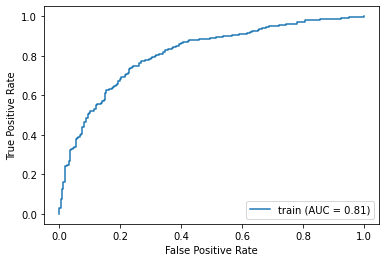

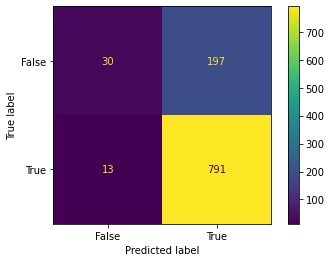

In [32]:
predictions, probabilities = logreg(X_train, X_test, y_train)

In [33]:
predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [40]:
dog_wins = probabilities[:,0]
dog_wins = dog_wins[dog_wins > .5]
print(dog_wins)

[]


In [38]:
fav_wins = probabilities[:,1]
fav_wins

array([0.82442303, 0.83246062, 0.81922838, 0.66546611, 0.63756888,
       0.83875745, 0.6386446 , 0.78363332, 0.66711396, 0.76976461,
       0.61801049])